In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
df=pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking the sheape
df.shape

(8523, 12)

The dataset has 8523 rows and 12 columns

In [5]:
#checking the datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

The datset has both numerical and string features

In [11]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The column Item_weight an outlet size has null values

In [13]:
#filling the Nan Values
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Outlet_Size'] = si.fit_transform(df['Outlet_Size'].values.reshape(-1, 1))

In [14]:
df['Item_Weight'] = df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
#plotting the catogical columns
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

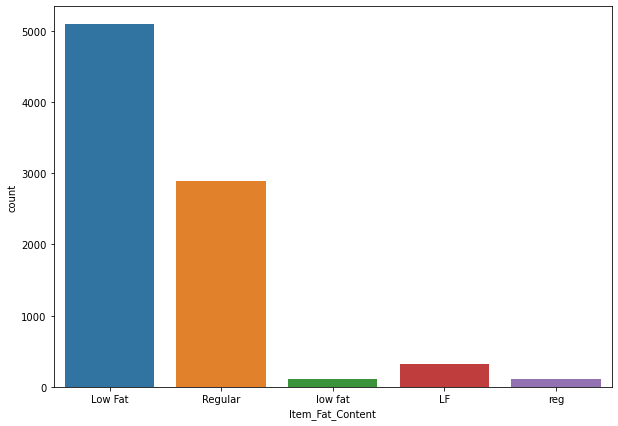

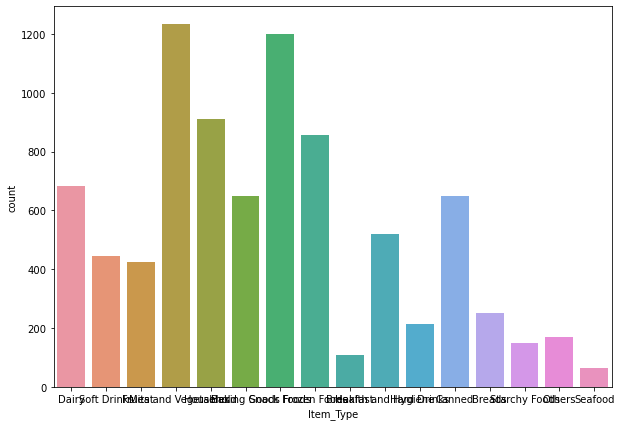

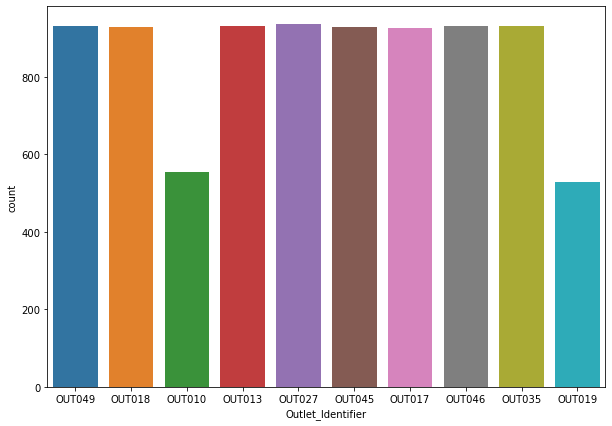

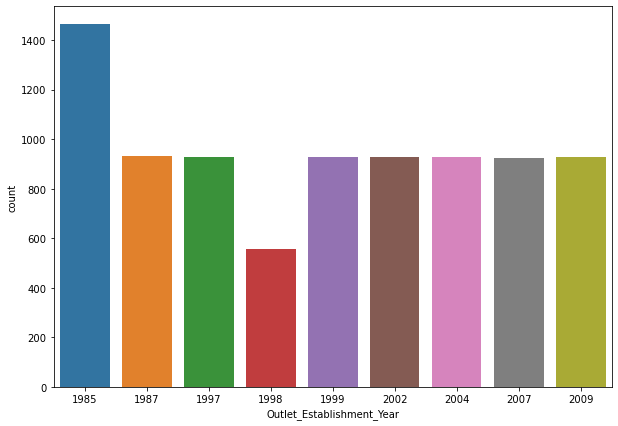

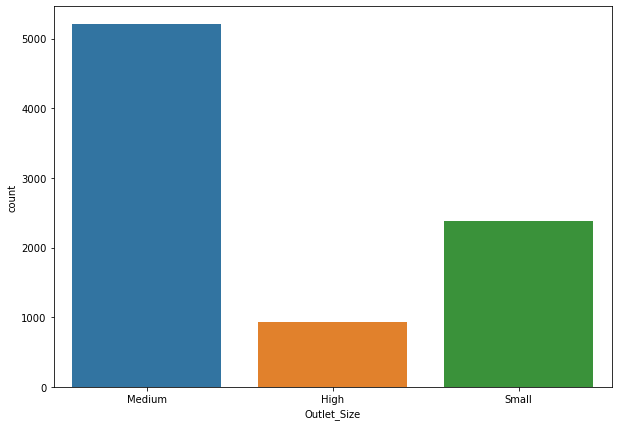

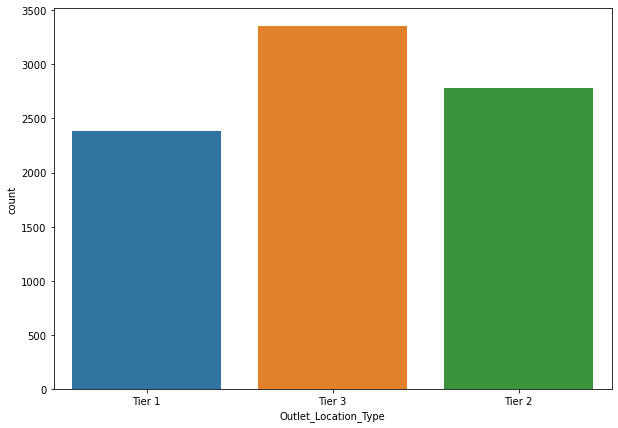

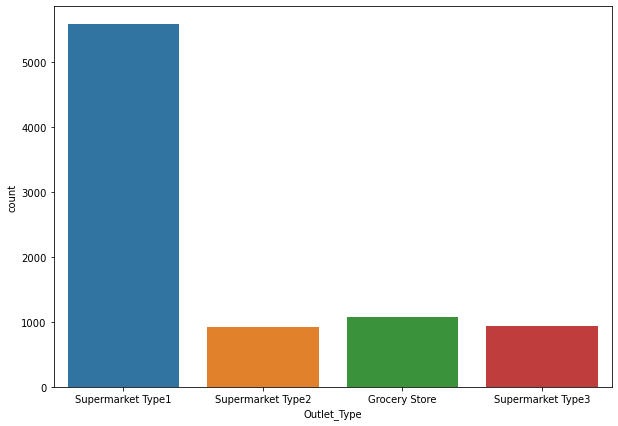

In [20]:
for i in cols:
    plt.figure(figsize = (10,7))
    ax = sns.countplot(x = i, data = df)

Item_Fat_Content- has catogories low fat and regular

Item_Type- shows the item contents

outlet type- the type of outlets varying from supermarket type1 to 3 adn grocery store

location type- the location type has 3 catogories

outlet size-3 cAtogories of size

establishment year- shows the year in which the store has been established

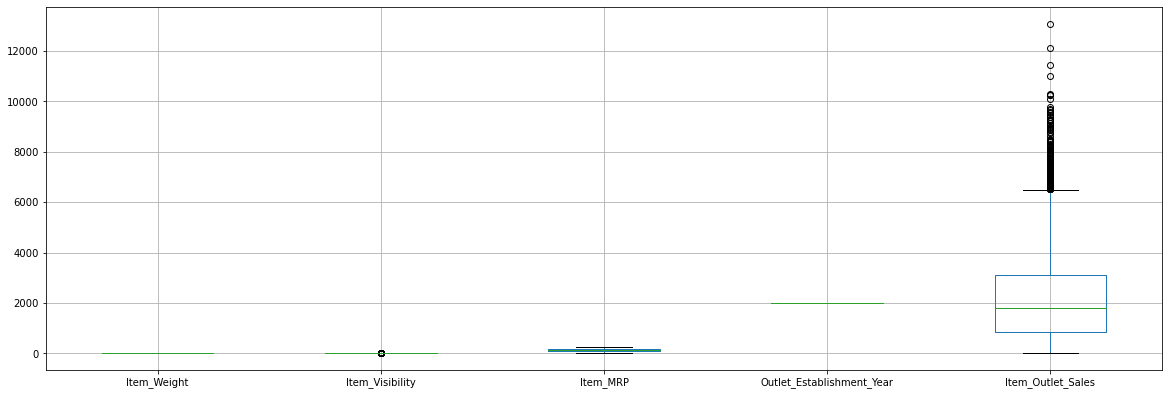

In [47]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)

The column sales has outliers

In [44]:
#checking the fat content column again
df['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Low fat has duplicate values low fat and LF, Regular has duplicate labels reg 

In [49]:
#correcting values in the Fat content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat','low fat','LF'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular', 'reg'],'Regular')

In [50]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [51]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder
col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
oe = OrdinalEncoder()
for i in col: 
    df[i] = oe.fit_transform(df[i].values.reshape (-1,1))

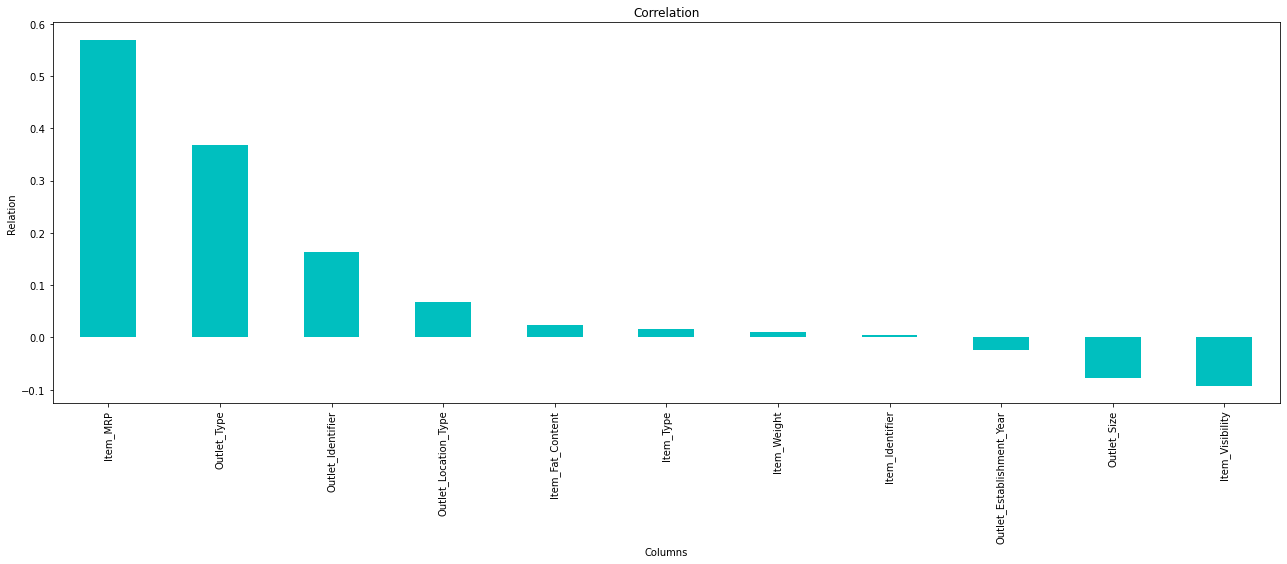

In [84]:
#Plotting the relationship between all the columns to Item_Outlet_Sales
plt.figure(figsize = (22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'c')
plt.xlabel('Columns')
plt.ylabel('Relation')
plt.title('Correlation')
plt.show()

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


<AxesSubplot:>

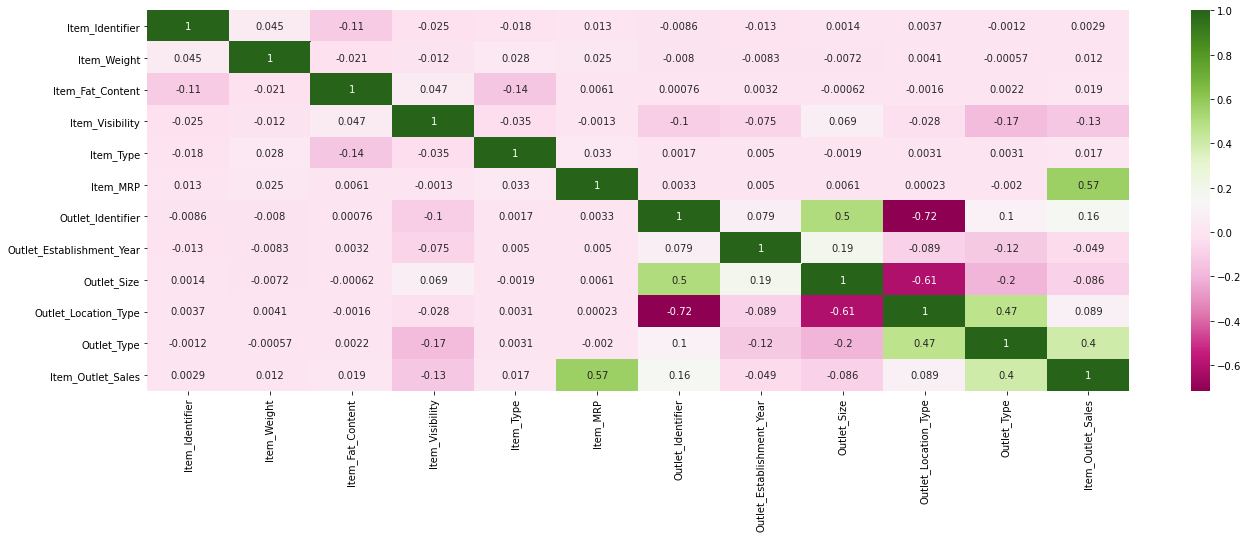

In [57]:
#Checking correlation Visualizing correlation using heatmap
plt.figure(figsize = (22,7))
sns.heatmap(df.corr(), annot = True, cmap='PiYG')

The feature mrp has the highest correlation with the sales

In [58]:
dfcor=df.corr()
dfcor['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

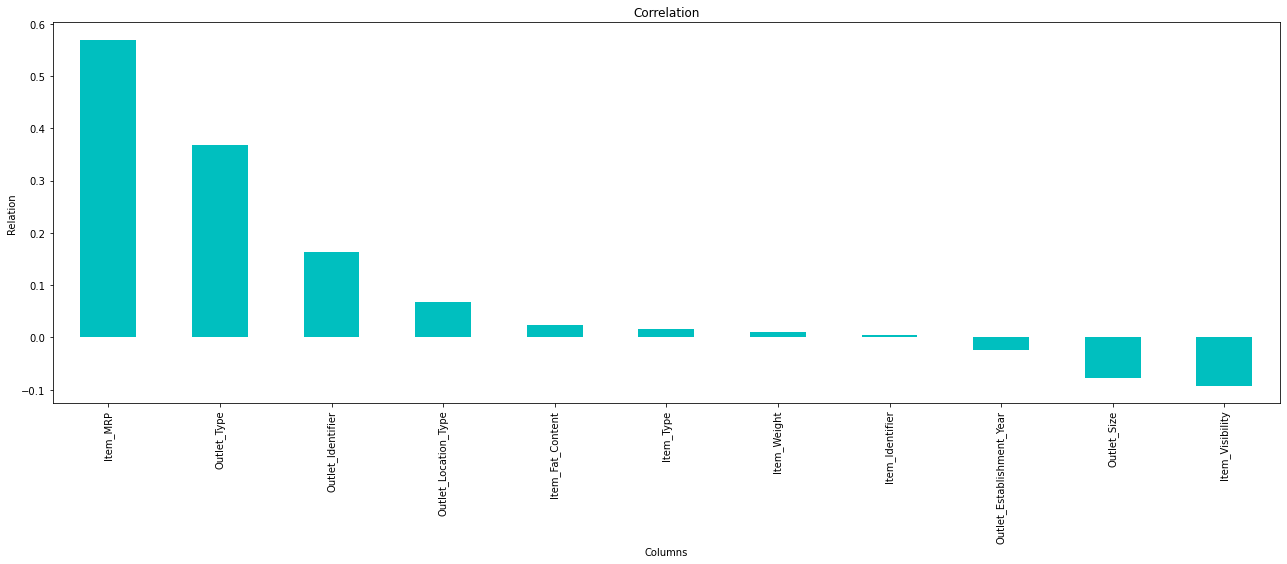

In [85]:
#Plotting the relationship between all the columns to Item_Outlet_Sales
plt.figure(figsize = (22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'c')
plt.xlabel('Columns')
plt.ylabel('Relation')
plt.title('Correlation')
plt.show()

The correlation of Item_MRP has the highest possitive impact to the sales column

In [59]:
#handling outliers
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 2
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [61]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(8338, 12)

Removing the outliers as the data loss is not significant

In [64]:
df=df_new

In [65]:
#Splitting the X and Y variables
x = df.iloc[:, 0:11]
y = df.iloc[:, -1]


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [68]:
#finding the best random state
lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.5280609252168798 on random state 50


In [69]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 50)

In [70]:
x_train.shape

(5836, 11)

In [71]:
x_test.shape

(2502, 11)

In [72]:

y_train.shape

(5836,)

In [73]:
y_test.shape

(2502,)

In [75]:
def model(mod):
    mod.fit(x_test,y_test)
    ##mod.coef_
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    print('\n\n')
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('mean absolute error:',mean_absolute_error(y_test,pred))

In [76]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    scores = cross_val_score(mod, x_train, y_train, scoring='r2', cv=5)
    print(scores)
    mean=scores.mean()
    print("Mean:",mean)

In [77]:
lr=LinearRegression()
model(lr)
crossval(lr)




r2score: 0.53348454100178
Mean squared error 1159014.1791748013
mean absolute error: 818.1746434821297
[0.46130164 0.49610041 0.49646182 0.46563223 0.49068527]
Mean: 0.4820362743800525


In [78]:
lasso=Lasso(alpha=0.01)
model(lasso)
crossval(lasso)




r2score: 0.5334845215627696
Mean squared error 1159014.227469211
mean absolute error: 818.1727245066181
[0.46129641 0.4960978  0.49645559 0.46564642 0.49068676]
Mean: 0.4820365966386241


In [79]:
k=['linear','poly','rbf']
for i in k:
    print('SVR kernel:',i)
    print('\n')
    svr=SVR(kernel=i)
    model(svr)
    crossval(svr)

SVR kernel: linear





r2score: 0.4883814288087236
Mean squared error 1271068.6578600698
mean absolute error: 840.9776220390952
[0.43388349 0.44970798 0.4540008  0.45023053 0.4658038 ]
Mean: 0.4507253211111548
SVR kernel: poly





r2score: -0.037736419528361154
Mean squared error 2578159.4184728824
mean absolute error: 1256.0109825081088
[-0.0416881  -0.08232253 -0.03581359 -0.02899593 -0.03248387]
Mean: -0.04426080546954814
SVR kernel: rbf





r2score: -0.039983011909577426
Mean squared error 2583740.8678641785
mean absolute error: 1257.5611438759336
[-0.04437204 -0.08463086 -0.03855354 -0.03202294 -0.03736278]
Mean: -0.047388430992918715


In [80]:
model(RandomForestRegressor())

crossval(RandomForestRegressor())




r2score: 0.9386493229084417
Mean squared error 152420.03942116315
mean absolute error: 276.08989118864906
[0.48989959 0.53791832 0.52951269 0.5062917  0.52823092]
Mean: 0.5183706418062828


In [81]:
model(KNeighborsRegressor())
crossval(KNeighborsRegressor())




r2score: 0.501320251430664
Mean squared error 1238923.3589393026
mean absolute error: 835.8363788009593
[0.1259114  0.22231901 0.16090667 0.18297352 0.18765095]
Mean: 0.17595230827819533


In [82]:
model(ElasticNet())
crossval(ElasticNet())




r2score: 0.5012462596168075
Mean squared error 1239107.184704877
mean absolute error: 838.7186279112696
[0.42946881 0.4609193  0.45664633 0.44906368 0.46518179]
Mean: 0.452255981270849


In [88]:
model(Ridge(alpha=0.01))
crossval(Ridge(alpha=0.01))




r2score: 0.533484537654897
Mean squared error 1159014.1874898202
mean absolute error: 818.1740273691014
[0.46130091 0.49610003 0.49646069 0.46563496 0.49068533]
Mean: 0.48203638339030264


### Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
gscv = GridSearchCV(rfr, parameters)
gscv.fit(x_train, y_train)

print(gscv.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [98]:
rfr = RandomForestRegressor(criterion = 'mae', max_features = 'sqrt')
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
predr= rfr.predict(x_test)
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predr))
print('Mean squared error: ', mean_squared_error(y_test,predr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predr))

Errors:


Mean absolute error:  715.3038785335732
Mean squared error:  1022880.0418992141
Root mean squared error:  1011.3753219745943


R2 Score:  0.5882799703222947


### Saving the model

In [99]:
import joblib
joblib.dump(rfr, 'Big_mart.obj')

['Big_mart.obj']

In [100]:
final = joblib.load('Big_mart.obj')
final.predict(x_train)

array([ 628.505213, 2008.95163 , 1266.498076, ...,  457.491154,
        362.814394, 3174.278067])

### Importing the Test Data


In [102]:

tf = pd.read_csv('bigdatamart_Test.csv')
tf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [103]:
tf.shape

(5681, 11)

In [104]:
tf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [105]:
tf.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [106]:
tf['Item_Weight'] = tf['Item_Weight'].fillna(np.mean(tf['Item_Weight']))

In [113]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
tf['Outlet_Size'] = si.fit_transform(tf['Outlet_Size'].values.reshape(-1, 1))

In [114]:
tf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [115]:
tf['Item_Fat_Content'] = tf['Item_Fat_Content'].replace(['Low Fat','low fat','LF'],'Low Fat')

In [116]:
tf['Item_Fat_Content'] = tf['Item_Fat_Content'].replace(['Regular', 'reg'],'Regular')

In [117]:
tf['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [119]:
col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in col: 
    tf[i] = oe.fit_transform(tf[i].values.reshape (-1,1))

In [121]:
testing = joblib.load('Big_mart.obj')
test_prediction = testing.predict(tf)

In [122]:
pd.DataFrame(test_prediction)

,0
0,1672.143384
1,1324.209620
2,692.984614
3,2170.894164
4,4155.357670
...,...
5676,2482.937979
5677,2916.553545
5678,1731.639272
5679,3621.539204
